In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from rocketpy import Function, LiquidMotor, MassFlowRateBasedTank, UllageBasedTank, MassBasedTank, Fluid, CylindricalTank

In [3]:
#%matplotlib widget

# Input Curves

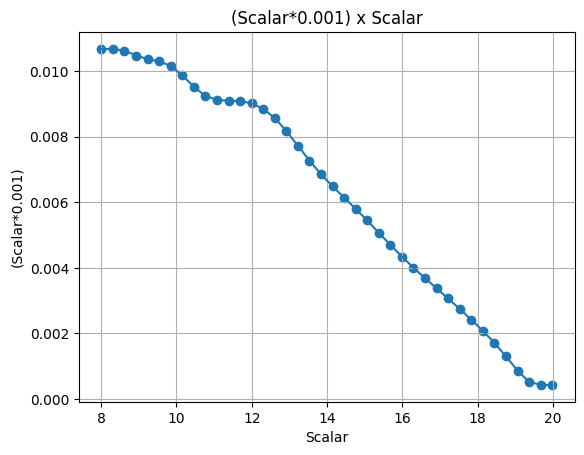

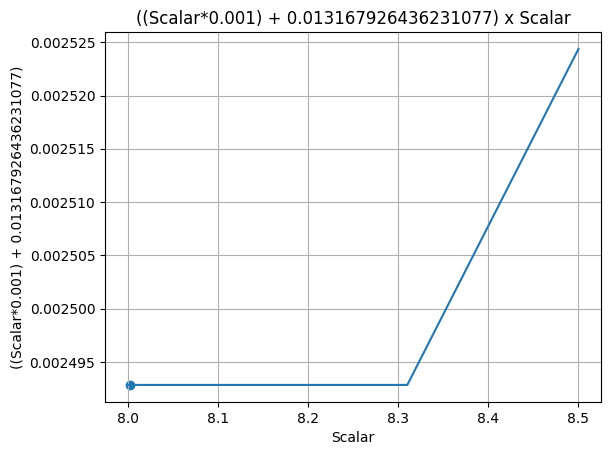

In [4]:
LOX_Volume_Liters = Function("../../data/SEBLM/test124_Lox_Volume.csv",extrapolation="zero")
LOX_Volume = LOX_Volume_Liters * 0.001
LOX_Volume.setDiscrete(8.003, 19.984, 40,interpolation="linear")
LOX_Volume.plot(forceData=True)
LOX_tank_ullage = 0.013167926436231077 - LOX_Volume
LOX_tank_ullage.plot(8,8.5,forceData=True)

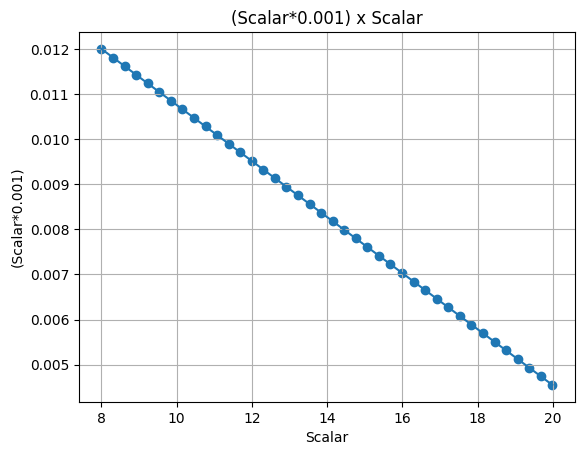

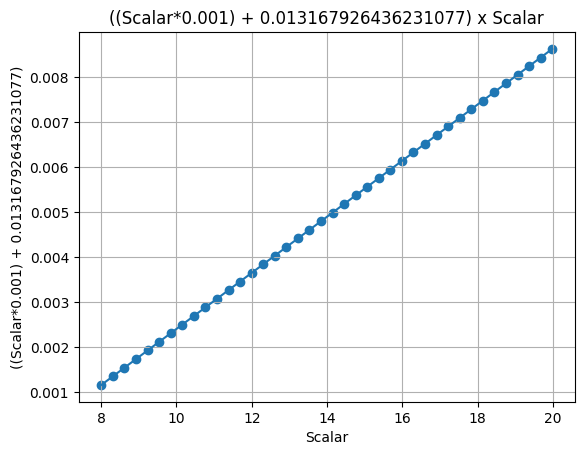

In [5]:
Propane_Volume_Liters = Function("../../data/SEBLM/test124_Propane_Volume.csv")
Propane_Volume = Propane_Volume_Liters * 0.001 # m3
Propane_Volume.setDiscrete(8.003, 19.984, 40,"linear")
Propane_Volume.plot(forceData=True)
Propane_tank_ullage = 0.013167926436231077 - Propane_Volume
Propane_tank_ullage.plot(forceData=True)

# Fluids

In [6]:
LOX = Fluid("LOX", 1024, 1)
Propane = Fluid("Propane", 566, 1)
LOXTankPressurizingGas = Fluid("N2", 31.3/28, 1) # 450 PSI
PropaneTankPressurizingGas = Fluid("N2", 313*300/4500/28, 1) # 300 PSI
PressurizingGas = Fluid("N2", 313/28, 1)# 4500 PSI

# LOX Tank

In [7]:
LOX_tank_geometry = CylindricalTank(0.0744,0.658,spherical_caps=True)
LOX_tank = UllageBasedTank(
    name="LOX Tank",
    flux_time=(8,20),
    geometry=LOX_tank_geometry,
    gas=LOXTankPressurizingGas,
    liquid=LOX,
    ullage=LOX_tank_ullage,
)

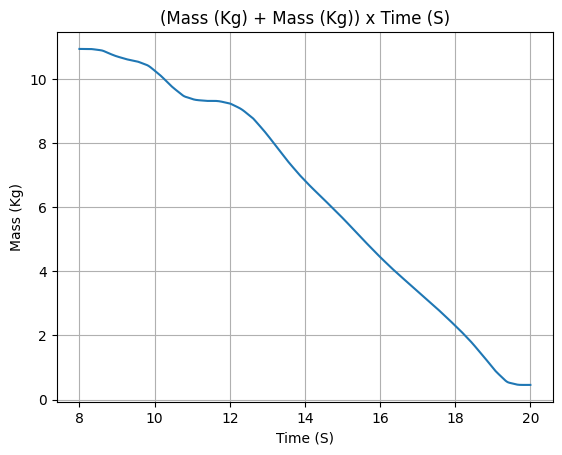

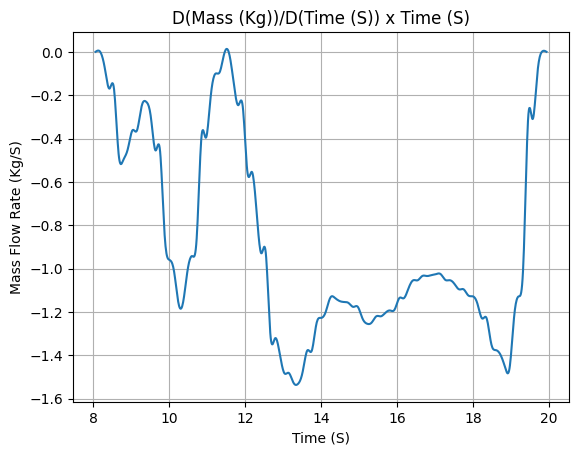

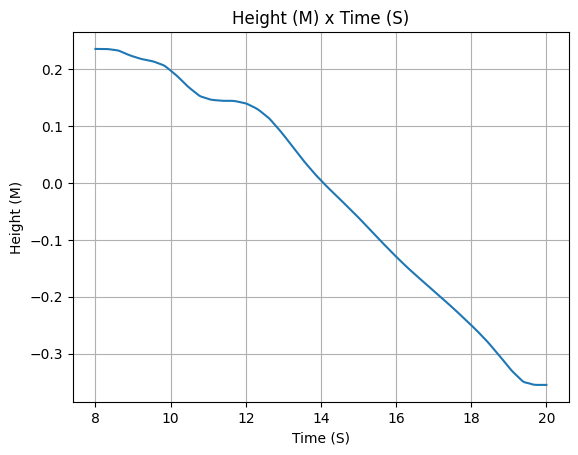

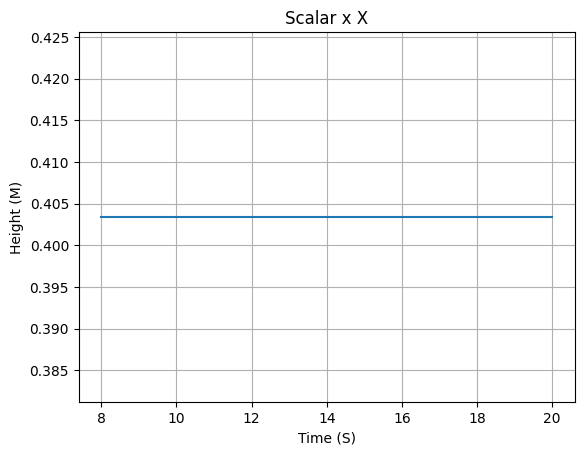

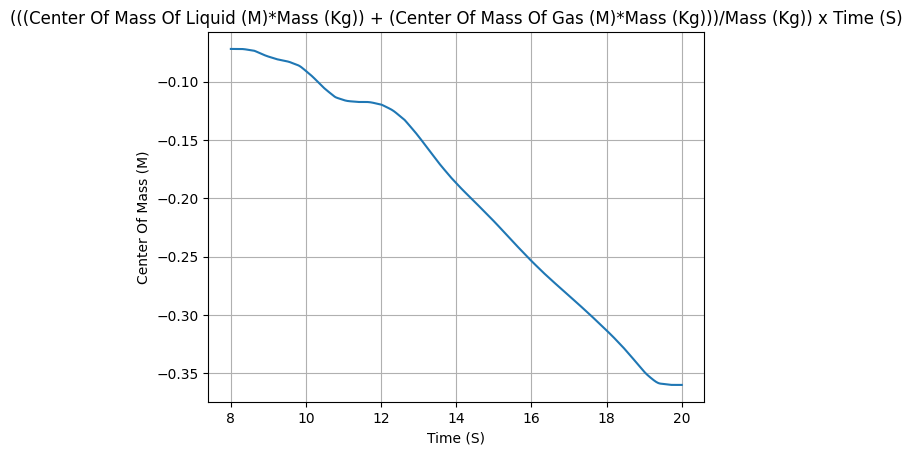

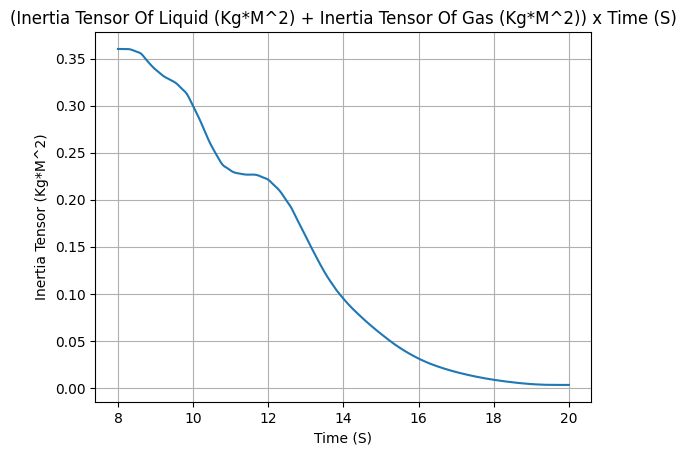

In [8]:
LOX_tank.mass()
LOX_tank.netMassFlowRate()
LOX_tank.liquidHeight()
LOX_tank.gasHeight()
LOX_tank.centerOfMass()
LOX_tank.inertiaTensor()

# Propane Tank

In [9]:
Propane_tank_geometry = CylindricalTank(0.0744,0.658,spherical_caps=True)
Propane_tank = UllageBasedTank(
    name="Propane Tank",
    flux_time=(8,20),
    geometry=Propane_tank_geometry,
    gas=PropaneTankPressurizingGas,
    liquid=Propane,
    ullage=Propane_tank_ullage,
)

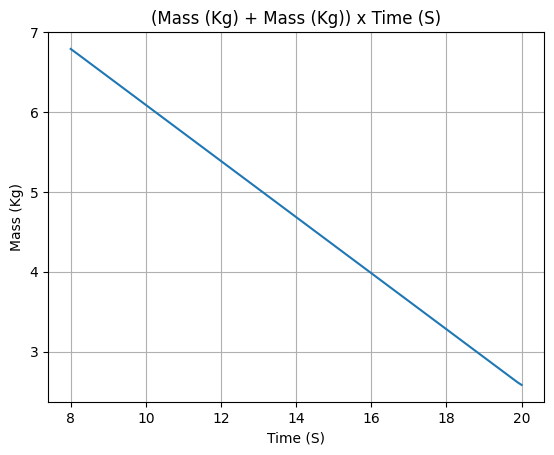

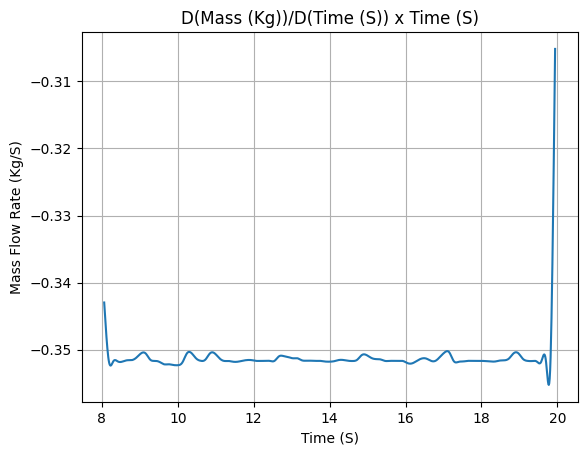

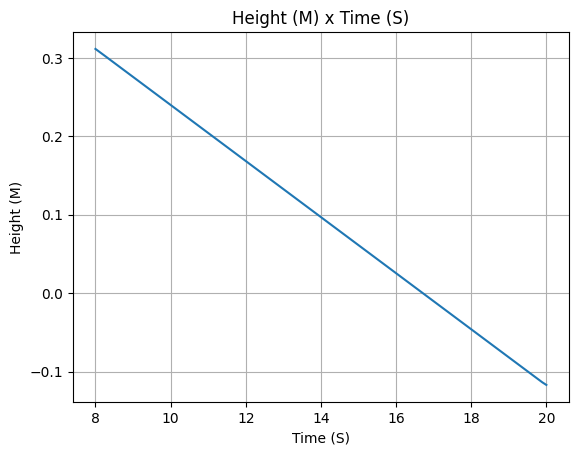

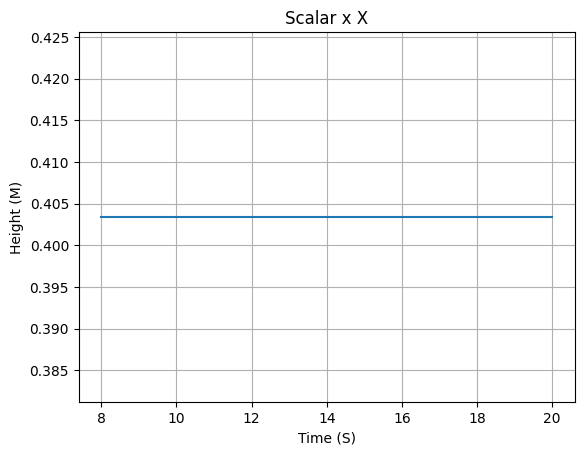

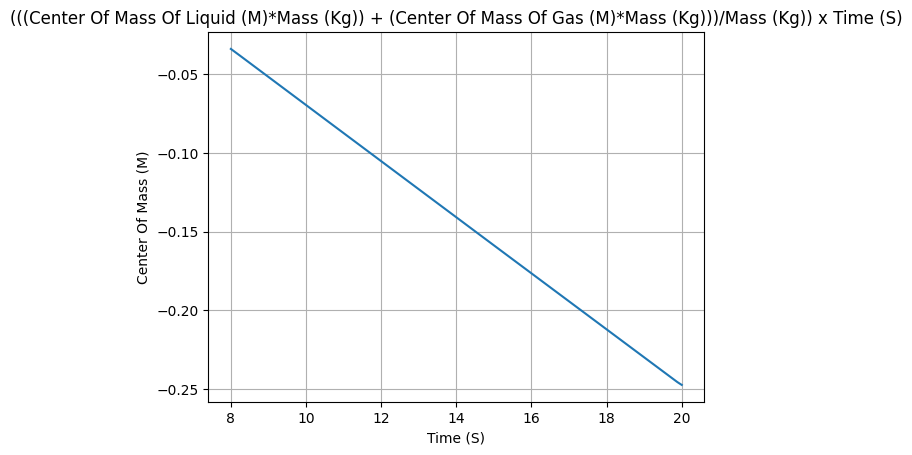

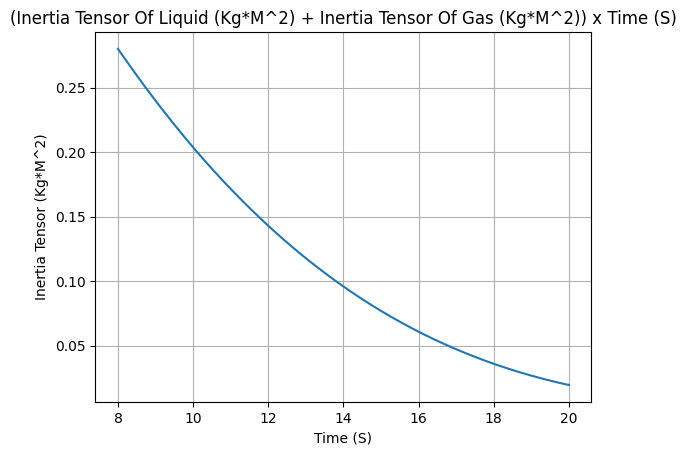

In [10]:
Propane_tank.mass()
Propane_tank.netMassFlowRate()
Propane_tank.liquidHeight()
Propane_tank.gasHeight()
Propane_tank.centerOfMass()
Propane_tank.inertiaTensor()

# Pressure Tank

In [11]:
Pressure_tank_geometry = CylindricalTank(0.135/2,0.846,spherical_caps=True)
Pressure_tank = MassBasedTank(
    name="Pressure Tank",
    geometry=Pressure_tank_geometry,
    liquid_mass=0,
    flux_time=(8,20),
    gas_mass="../../data/SEBLM/pressurantMassFiltered.csv",
    gas=PressurizingGas,
    liquid=PressurizingGas,
)


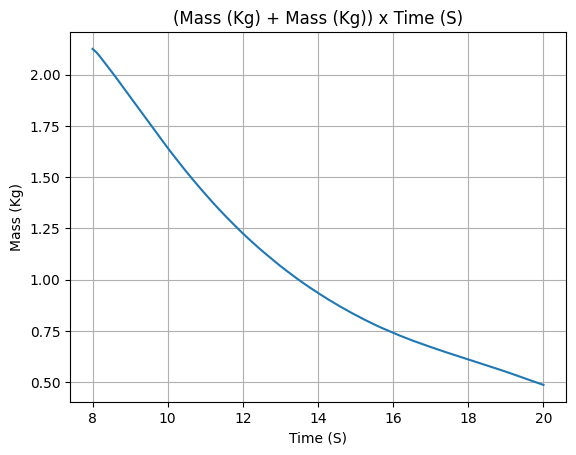

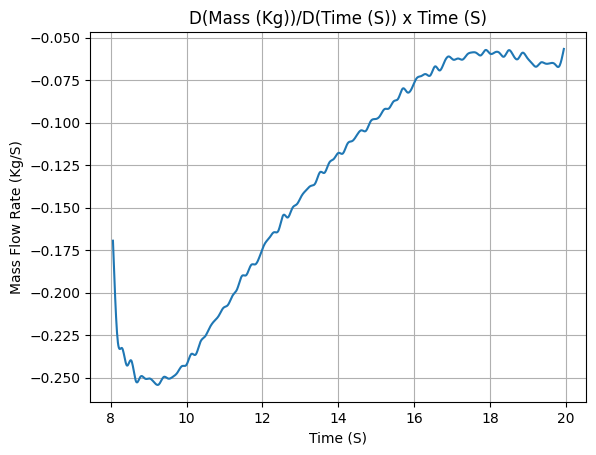

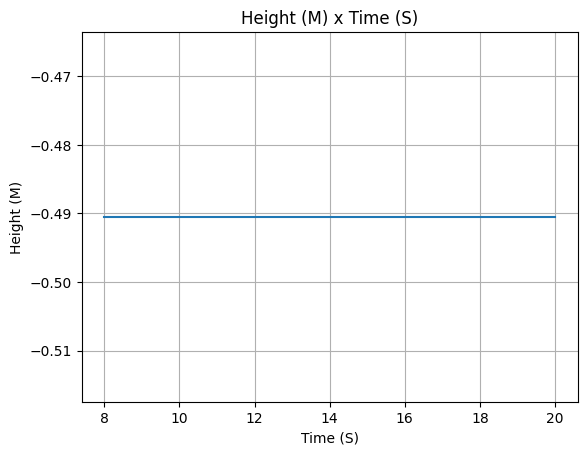

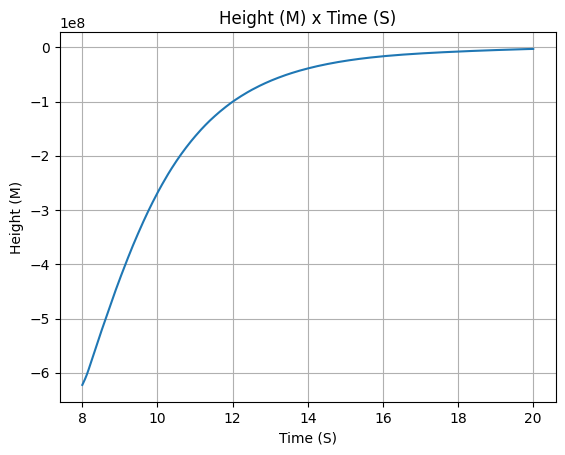

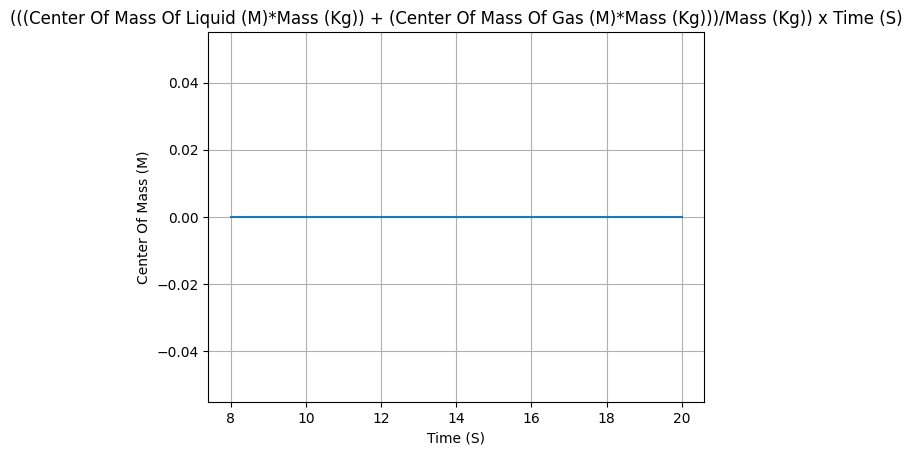

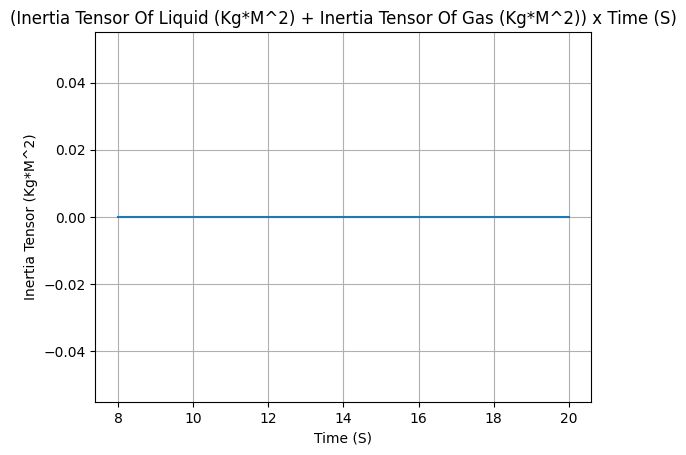

In [12]:
Pressure_tank.mass()
Pressure_tank.netMassFlowRate()
Pressure_tank.liquidHeight()
Pressure_tank.gasHeight()
Pressure_tank.centerOfMass()
Pressure_tank.inertiaTensor()

# Liquid Motor

In [13]:
SEBLM = LiquidMotor(
    thrustSource="../../data/SEBLM/test124_Thrust_Curve.csv",
    center_of_dry_mass=0,
    dry_inertia=(0,0,0),
    dry_mass=0,
    burn_time=(8,20),
    nozzleRadius=0.069/2,
    nozzlePosition=-1.364,
    coordinateSystemOrientation="nozzleToCombustionChamber",
)

SEBLM.addTank(Propane_tank, position=-1.048)
SEBLM.addTank(LOX_tank, position=0.711)
SEBLM.addTank(Pressure_tank, position=2.007)

Nozzle Details
Nozzle Radius: 0.0345 m

Motor Details
Total Burning Time: 12 s
Total Propellant Mass: 19.852 kg
Average Propellant Exhaust Velocity: 1743.503 m/s
Average Thrust: 2064.885 N
Maximum Thrust: 2428.4243134124745 N at 17.666 s after ignition.
Total Impulse: 24778.624 Ns

Plots


/home/phmb/github/RocketPy/rocketpy/Function.py:2465: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  ans, _ = integrate.quad(self, a, b, epsabs=0.001, limit=10000)


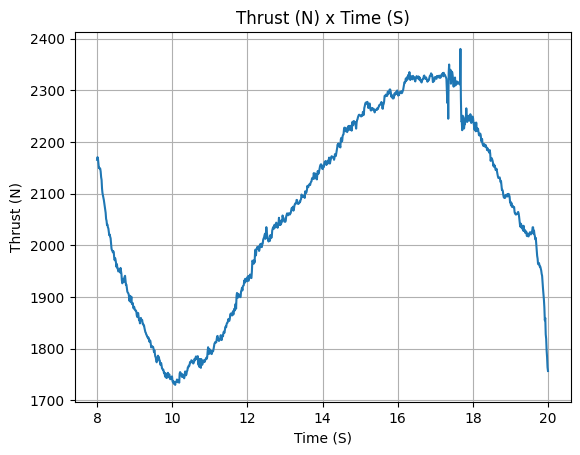

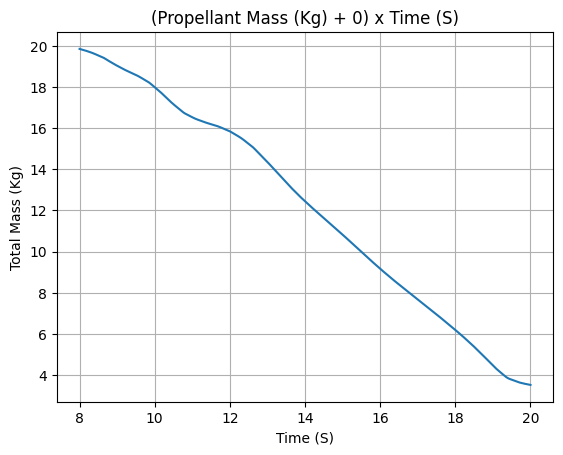

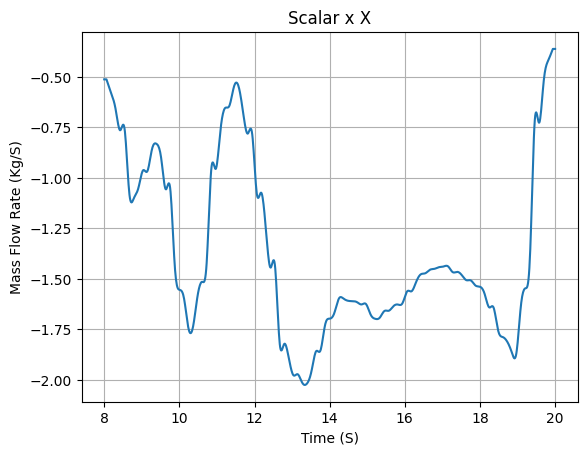

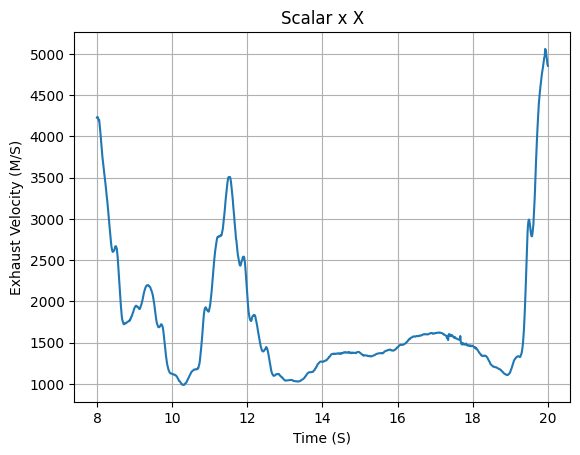

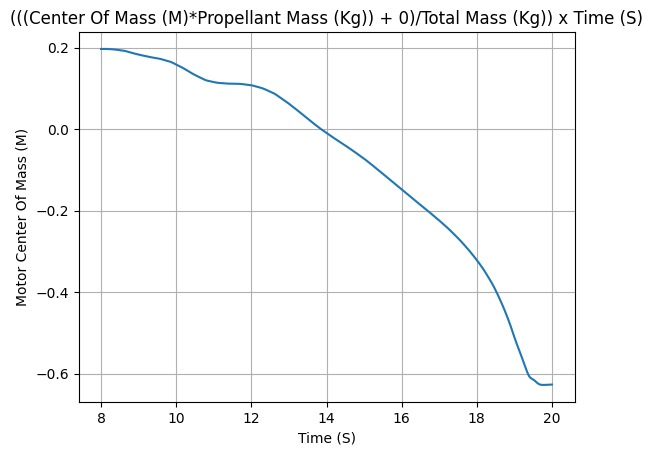

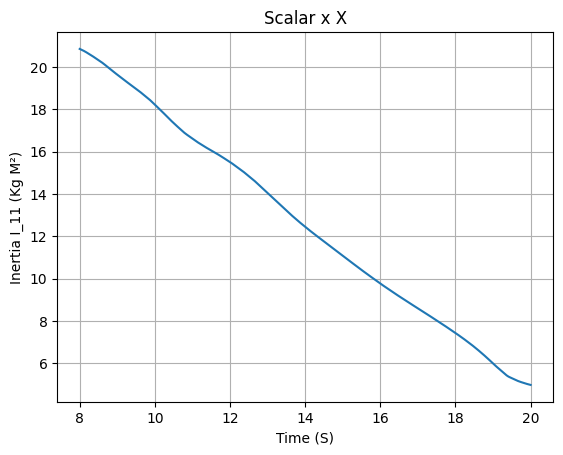

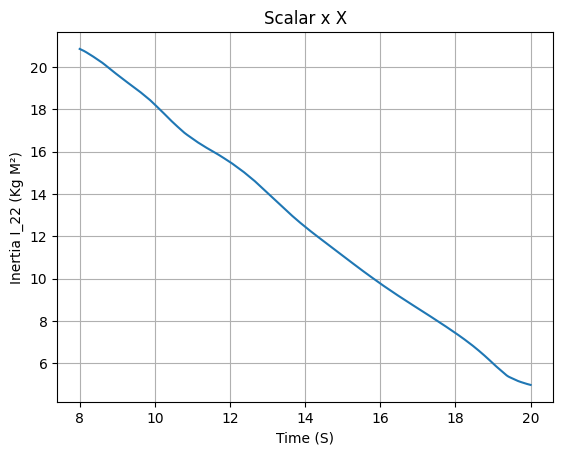

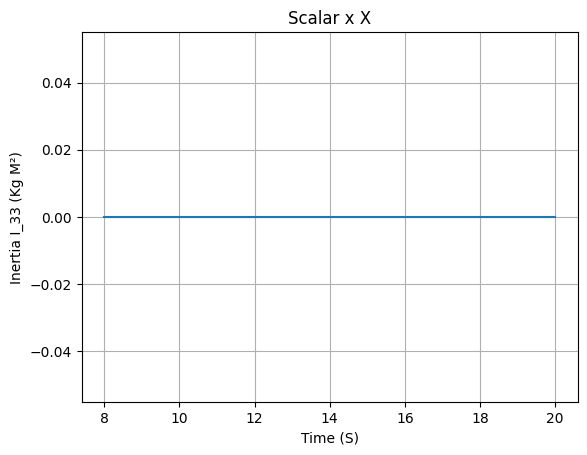

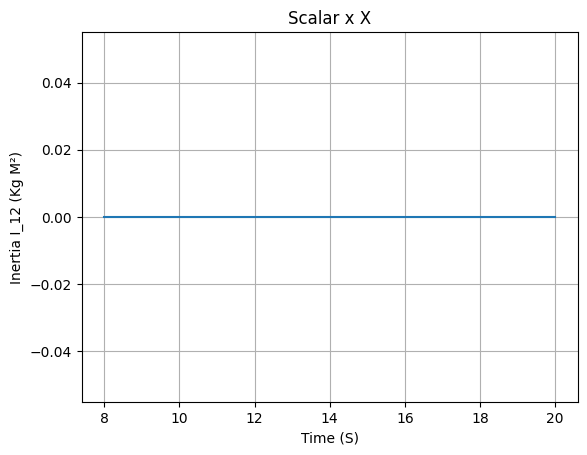

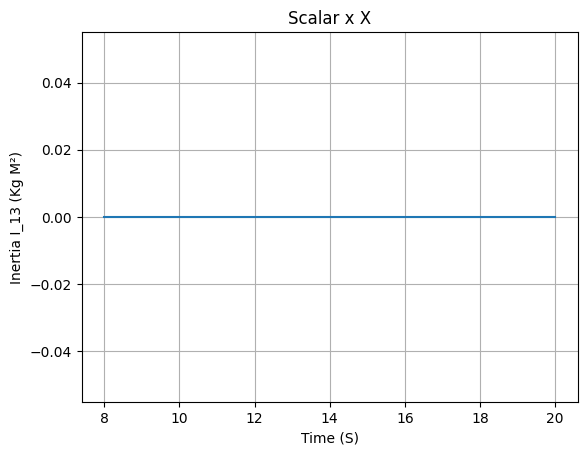

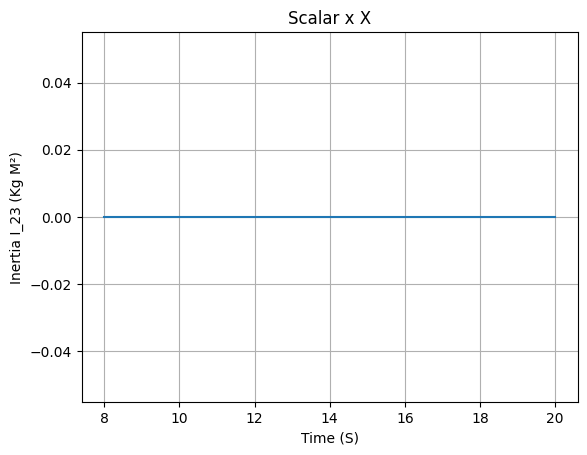

In [14]:
SEBLM.allInfo()

# Rocket Definition

In [15]:
from rocketpy import Rocket

SEBRocket = Rocket(
    radius=0.098,
    mass=63.4,
    inertia=(25,25,1),
    powerOffDrag="../../data/SEBLM/drag.csv",
    powerOnDrag="../../data/SEBLM/drag.csv",
    center_of_mass_without_motor=3.23,
    coordinateSystemOrientation="noseToTail",
)
SEBRocket.addMotor(SEBLM, position=5.75)
SEBRocket.addNose(length=0.7, kind="vonKarman", position=0)
SEBRocket.addTail(
    topRadius=0.098, bottomRadius=0.058, length=0.198, position=5.69-0.198
)

SEBRocket.addTrapezoidalFins(
    n=4,
    rootChord=0.355,
    tipChord=0.0803,
    span=0.156,
    position=5.25,
    cantAngle=0,
)

# Ignore next line
#SEBRocket.setRailButtons([-1, 1])
# I don't know if this is correct
SEBRocket.setRailButtons(lower_button_position=-1, upper_button_position=1)



Inertia Details

Rocket Mass: 63.400 kg (No Propellant)
Rocket Mass: 83.252 kg (With Propellant)
Rocket Inertia 11: 25.000 kg*m2
Rocket Inertia 22: 25.000 kg*m2
Rocket Inertia 33: 1.000 kg*m2
Rocket Inertia 12: 0.000 kg*m2
Rocket Inertia 13: 0.000 kg*m2
Rocket Inertia 23: 0.000 kg*m2


Geometrical Parameters

Rocket Maximum Radius: 0.098 m
Rocket Frontal Area: 0.030172 m2

Rocket Distances
Rocket Center of Dry Mass - Nozzle Exit Distance: 2.520 m
Rocket Center of Dry Mass - Center of Propellant Mass: 0.959 m
Rocket Center of Mass - Rocket Loaded Center of Mass: 0.229 m

Aerodynamic Components Parameters
Currently not implemented.


Aerodynamics Lift Coefficient Derivatives

Nosecone Lift Coefficient Derivative: 2.000/rad
Tail Lift Coefficient Derivative: -1.299/rad
Fins Lift Coefficient Derivative: 5.895/rad

Aerodynamics Center of Pressure

Nosecone Center of Pressure to CM: 0.350 m
Tail Center of Pressure to CM: 0.091 m
Fins Center of Pressure to CM: 0.170 m
Distance - Center of Pre

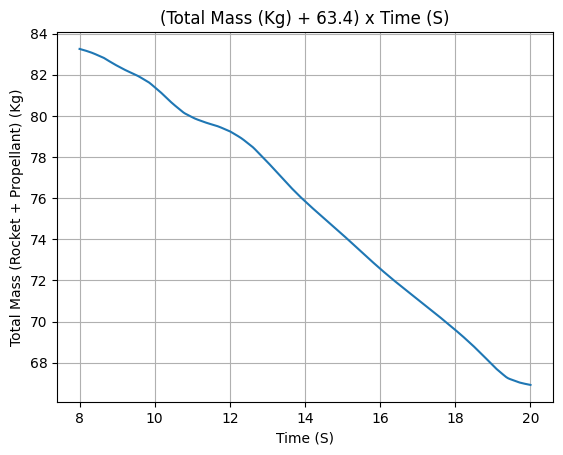

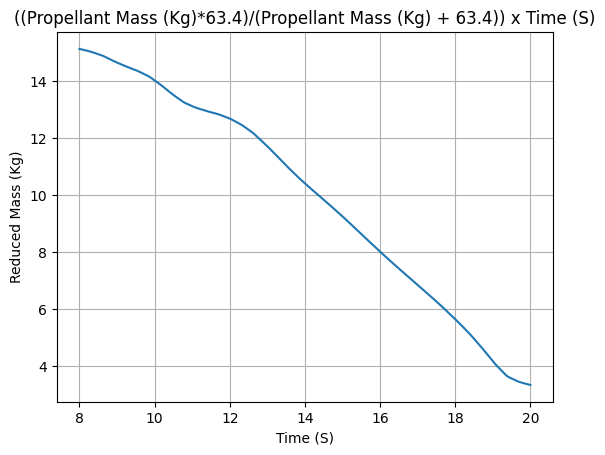


Aerodynamics Plots


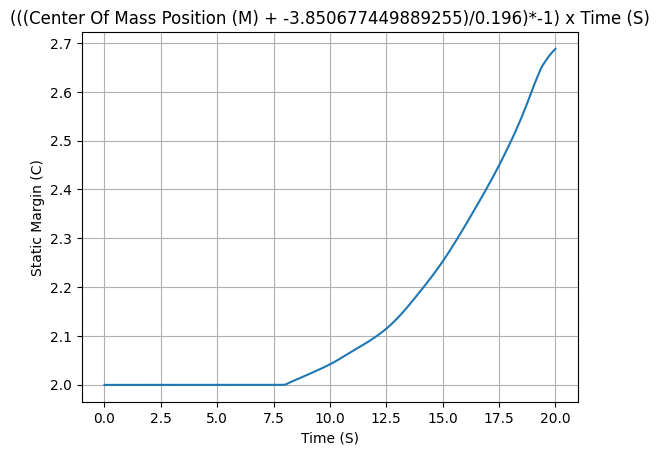

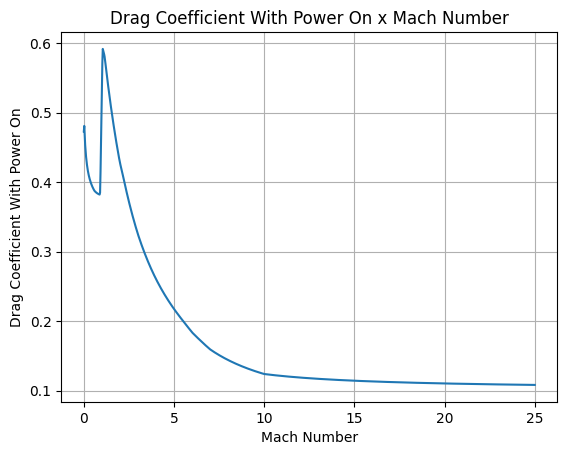

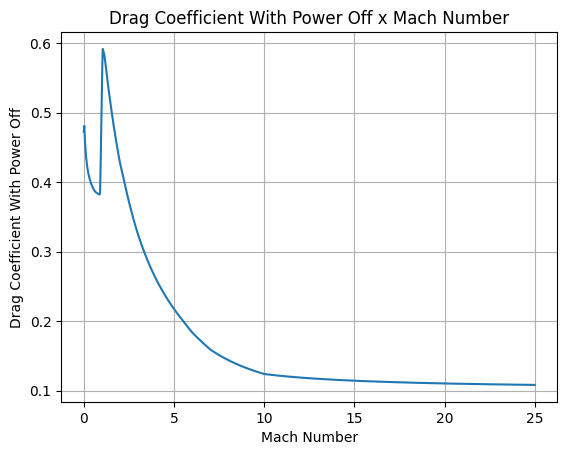

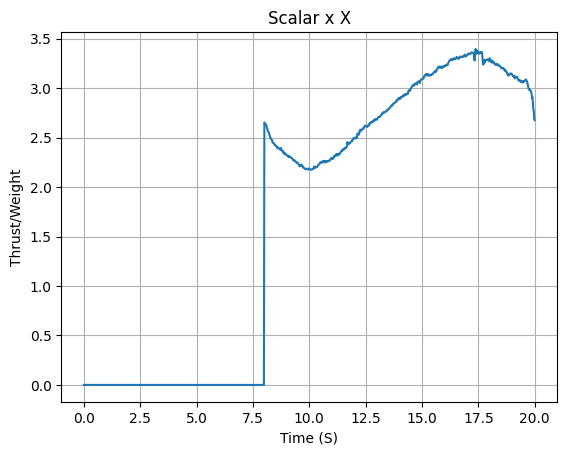

In [16]:
SEBRocket.allInfo()

In [17]:
from rocketpy import Environment

env = Environment(
    railLength=18.28, latitude=35.347122986338356, longitude=-117.80893423073582
)

# env.setDate((2022,12,3,14+7,0,0)) # UTC
# env.setAtmosphericModel(type="Forecast", file="GFS")

In [18]:
from rocketpy import Flight

TestFlight = Flight(rocket=SEBRocket, environment=env, inclination=90, heading=23, maxTimeStep=0.1)

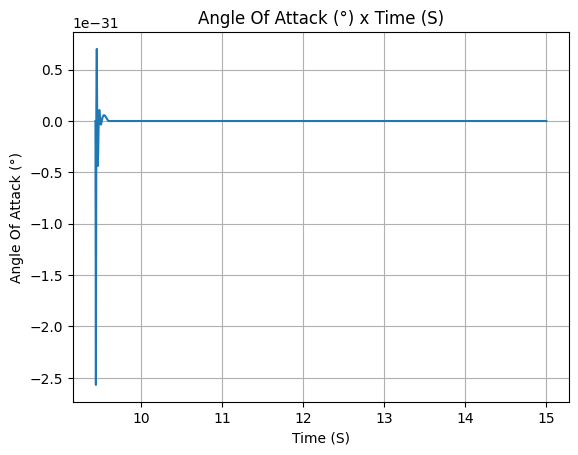

In [19]:
TestFlight.angleOfAttack.plot(TestFlight.outOfRailTime, 15)


Initial Conditions

Position - x: 0.00 m | y: 0.00 m | z: 0.00 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude - e0: 0.980 | e1: 0.000 | e2: -0.000 | e3: -0.199
Euler Angles - Spin φ : -191.50° | Nutation θ: -0.00° | Precession ψ: 168.50°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s| ω3: 0.00 rad/s


Surface Wind Conditions

Frontal Surface Wind Speed: 0.00 m/s
Lateral Surface Wind Speed: 0.00 m/s


Launch Rail Orientation

Launch Rail Inclination: 90.00°
Launch Rail Heading: 23.00°


Rail Departure State

Rail Departure Time: 9.434 s
Rail Departure Velocity: 19.715 m/s
Rail Departure Static Margin: 2.029 c
Rail Departure Angle of Attack: 0.000°
Rail Departure Thrust-Weight Ratio: 2.252
Rail Departure Reynolds Number: 2.642e+05


Burn out State

Burn out time: 20.000 s
Altitude at burn out: 1097.350 m (AGL)
Rocket velocity at burn out: 199.213 m/s
Freestream velocity at burn out: 199.213 m/s
Mach Number at burn out: 0.593
Kinetic energy at burn out: 1.328e+06 J


/home/phmb/github/RocketPy/rocketpy/plots/flight_plots.py:117: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax1.set_ylim3d([minXY, maxXY])
/home/phmb/github/RocketPy/rocketpy/plots/flight_plots.py:118: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax1.set_xlim3d([minXY, maxXY])


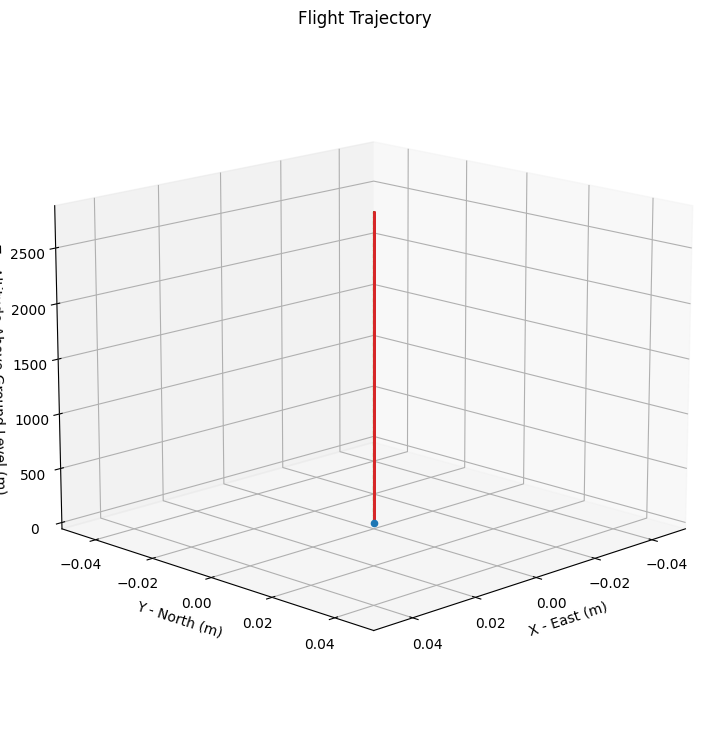



Trajectory Kinematic Plots



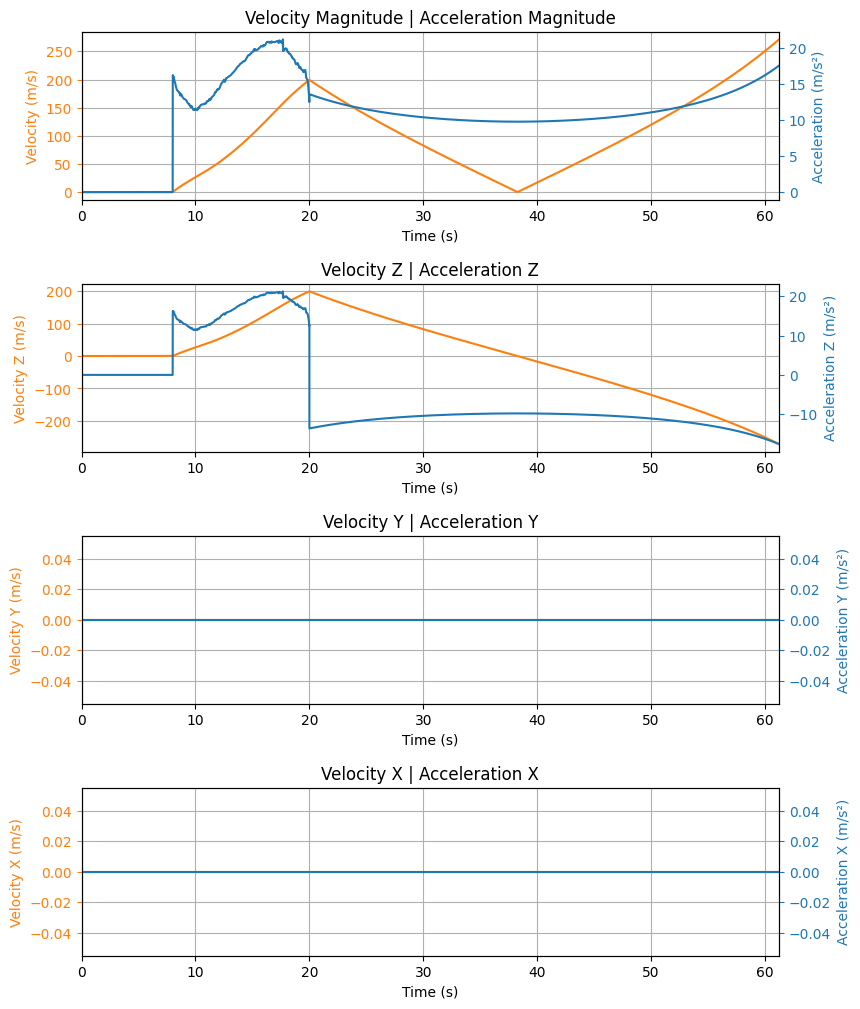



Angular Position Plots



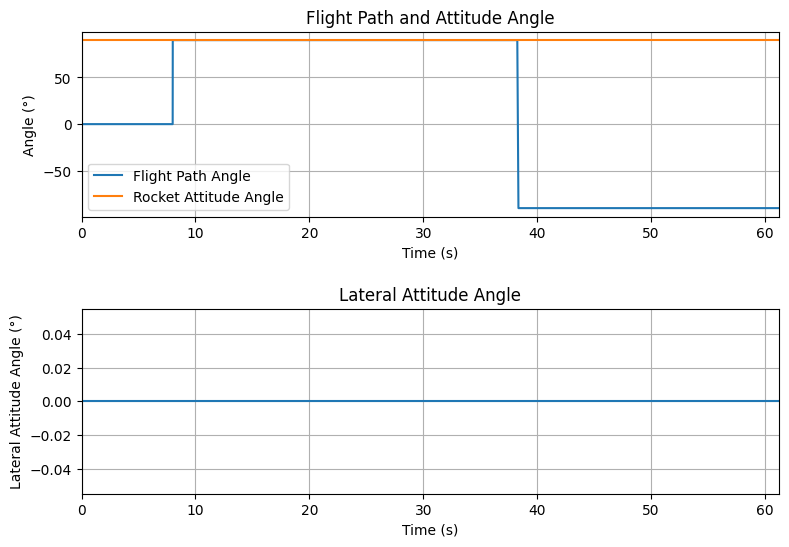

findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.




Path, Attitude and Lateral Attitude Angle plots



findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeOneSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeTwoSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeThreeSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeFourSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeFiveSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Fal

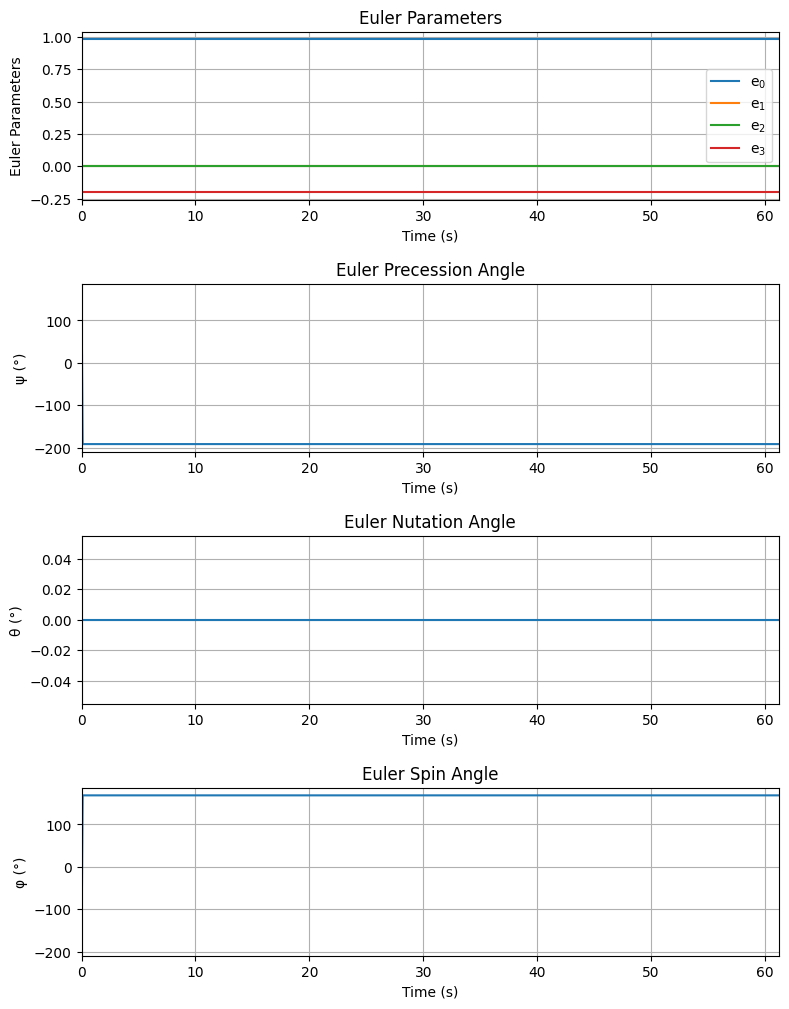



Trajectory Angular Velocity and Acceleration Plots



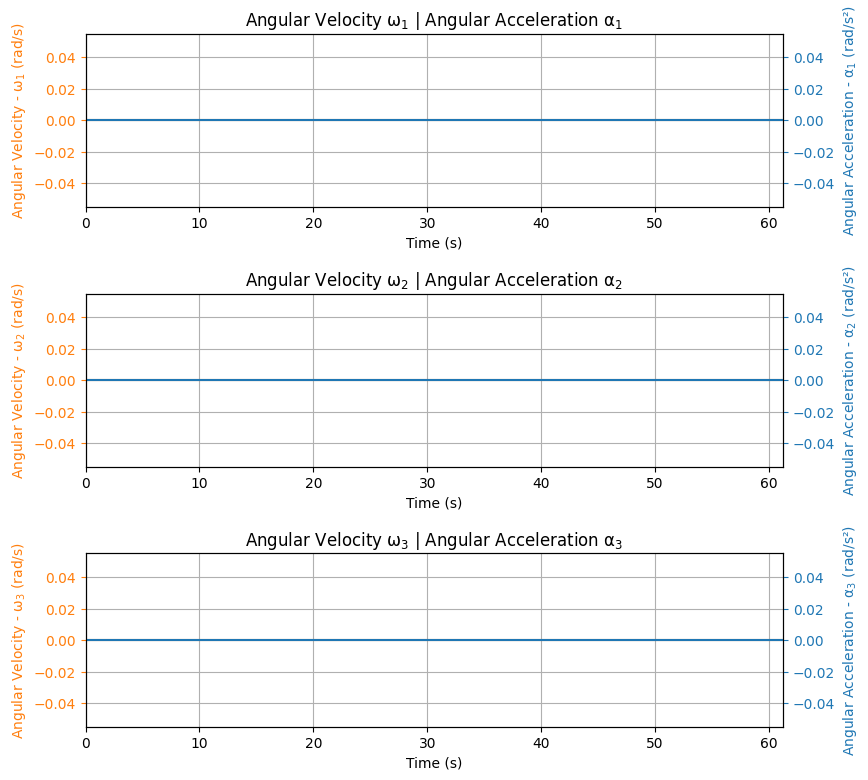



Trajectory Force Plots



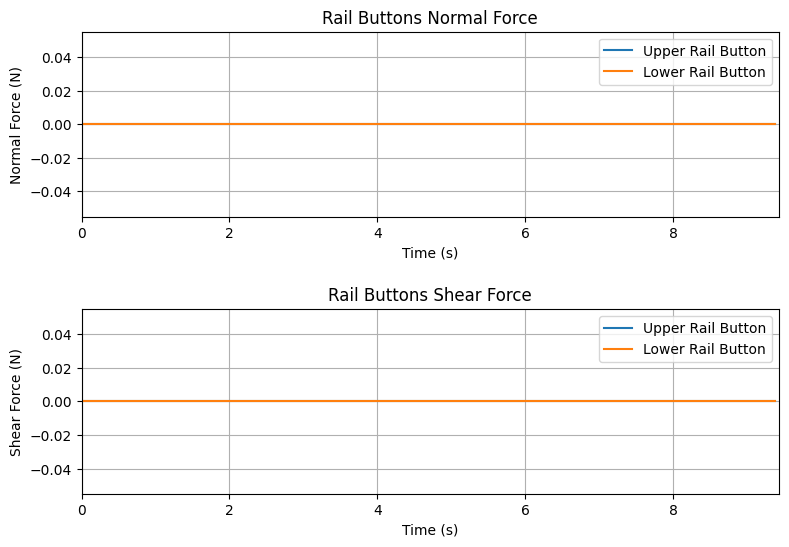

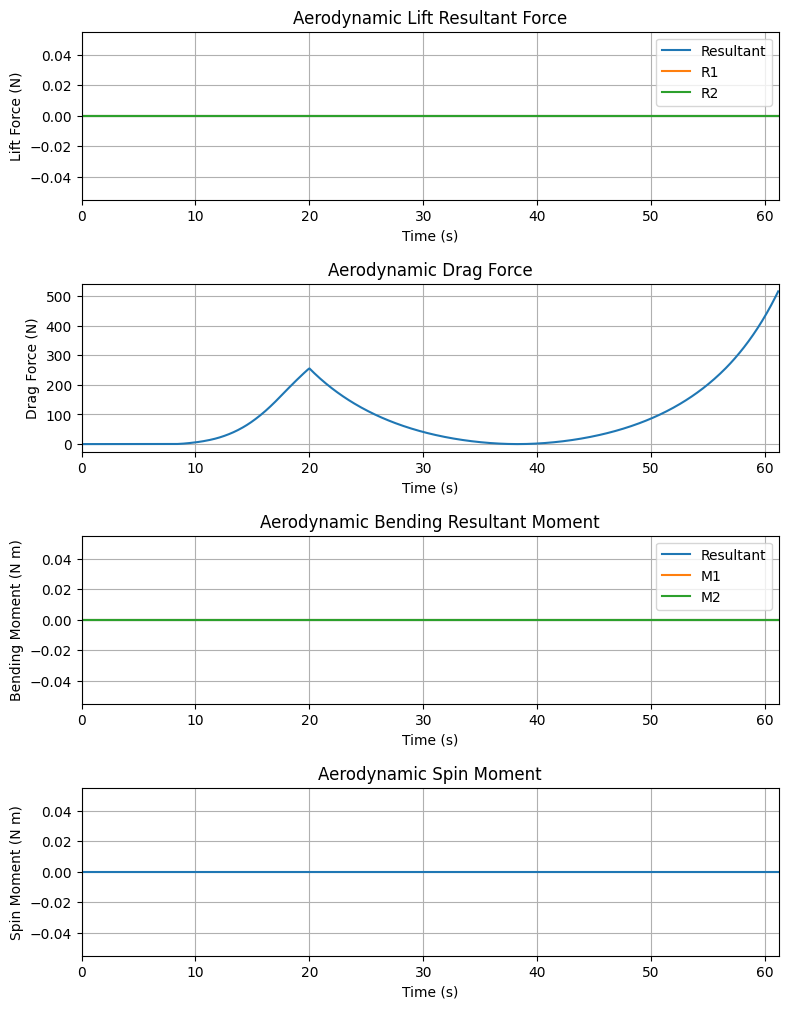



Trajectory Energy Plots



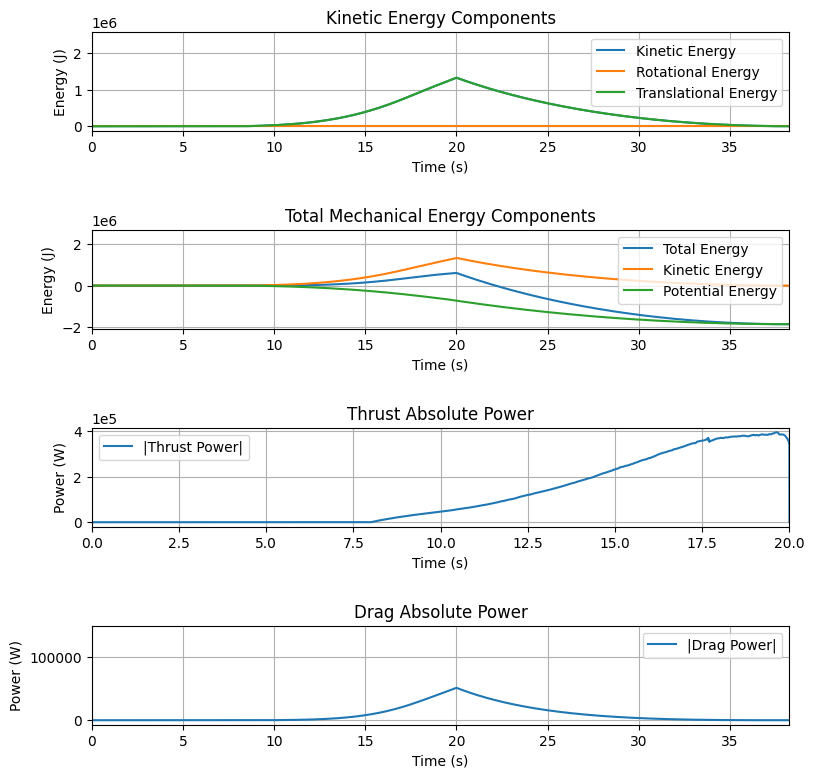



Trajectory Fluid Mechanics Plots



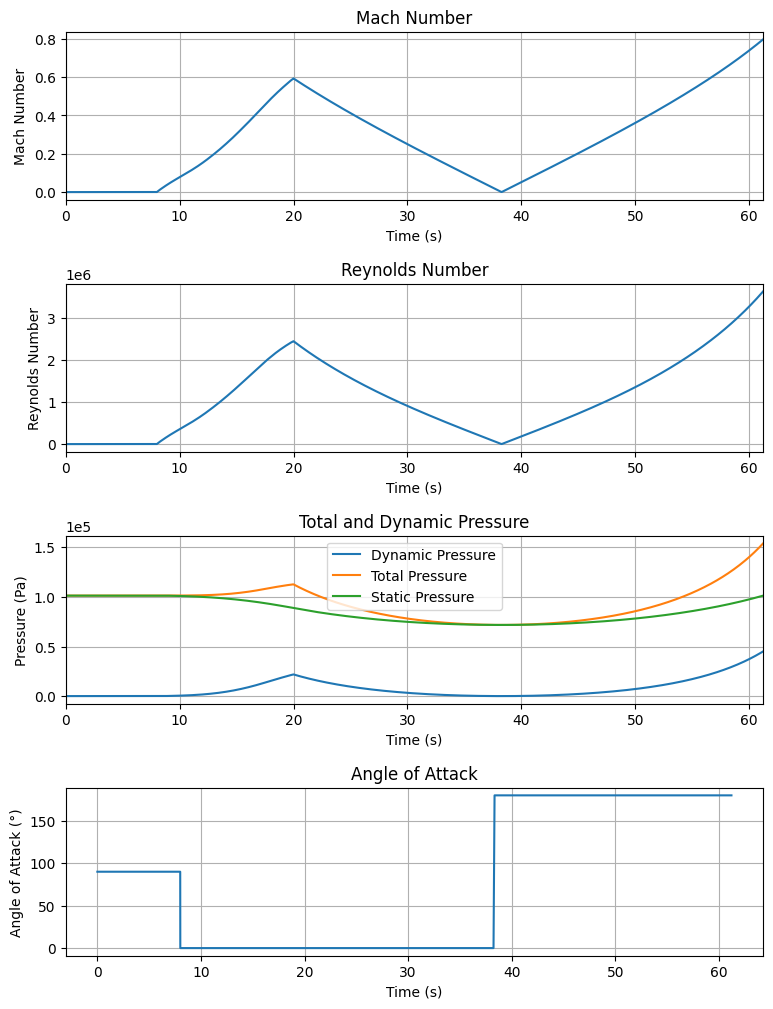



Trajectory Stability and Control Plots



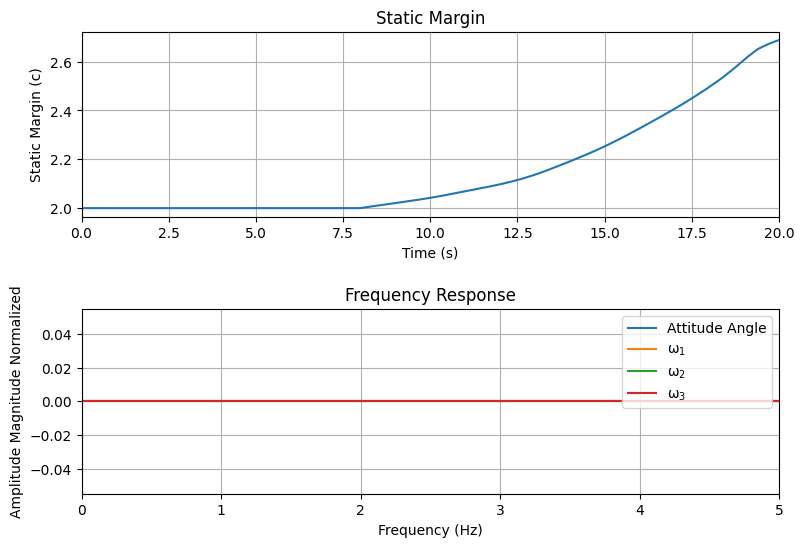



Rocket and Parachute Pressure Plots



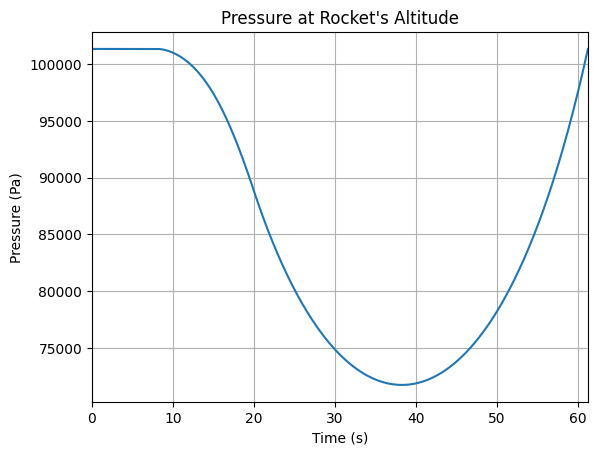


Rocket has no parachutes. No parachute plots available


In [20]:
TestFlight.allInfo()

- Rocket radius (largest radius)
- Rocket dry mass (includes everything except propellant)
- Rocket inertia tensor (I, Z)
- Drag curves (power on, power off)
- Nozzle position 
- NoseCone length, kind (von Karman) and position (tip position)
- FinSet (n=3, rootChord, tipChord, span, position (tip of root chord), cantAngle)
- Boattail top radius, bottom radius, length, position (top radius position)